# Project

In [2]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [3]:
df=pd.read_csv('Train_upvotes.csv',header=0)
df.head(10)

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942,2,155623,7855,42
1,327662,a,26046,12,21781,55801,1175
2,468453,c,1358,4,56177,8067,60
3,96996,a,264,3,168793,27064,9
4,131465,c,4271,4,112223,13986,83
5,345568,r,440,1,23866,5577,4
6,376865,c,147,1,10759,17184,17
7,467378,j,2269,2,54623,312,3
8,393640,j,111,2,172926,53738,79
9,130054,c,2749,1,10189,227,0


In [4]:
print(df.describe)

<bound method NDFrame.describe of             ID Tag  Reputation  Answers  Username  Views  Upvotes
0        52664   a        3942        2    155623   7855       42
1       327662   a       26046       12     21781  55801     1175
2       468453   c        1358        4     56177   8067       60
3        96996   a         264        3    168793  27064        9
4       131465   c        4271        4    112223  13986       83
...        ...  ..         ...      ...       ...    ...      ...
330040  339800   c          36        2     84919   1063        0
330041  253800   c        1649        2     76730  23319       73
330042  210756   c        6178        2     91701   2453       15
330043   56089   j          89        2     80245   2107        3
330044  300553   j        2001        4    154692   2554       37

[330045 rows x 7 columns]>


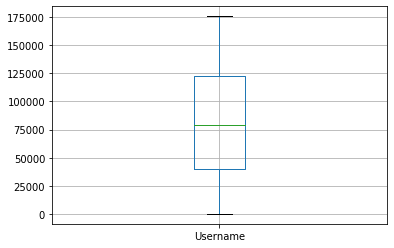

In [5]:
df.boxplot(column='Username')

In [6]:
df.boxplot

<bound method boxplot_frame of             ID Tag  Reputation  Answers  Username  Views  Upvotes
0        52664   a        3942        2    155623   7855       42
1       327662   a       26046       12     21781  55801     1175
2       468453   c        1358        4     56177   8067       60
3        96996   a         264        3    168793  27064        9
4       131465   c        4271        4    112223  13986       83
...        ...  ..         ...      ...       ...    ...      ...
330040  339800   c          36        2     84919   1063        0
330041  253800   c        1649        2     76730  23319       73
330042  210756   c        6178        2     91701   2453       15
330043   56089   j          89        2     80245   2107        3
330044  300553   j        2001        4    154692   2554       37

[330045 rows x 7 columns]>

In [7]:
df.dtypes

ID             int64
Tag           object
Reputation     int64
Answers        int64
Username       int64
Views          int64
Upvotes        int64
dtype: object

In [8]:
df.isna().sum()

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
Upvotes       0
dtype: int64

In [9]:
#for preprocessing the data and converting all the categorical data into numeric data
from sklearn import preprocessing

le=preprocessing.LabelEncoder()


df['Tag']=le.fit_transform(df['Tag'])
print(df.dtypes)

ID            int64
Tag           int32
Reputation    int64
Answers       int64
Username      int64
Views         int64
Upvotes       int64
dtype: object


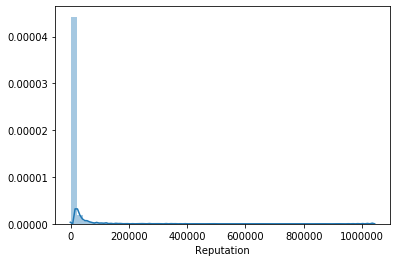

In [10]:
sns.distplot(df['Reputation'], hist=True)

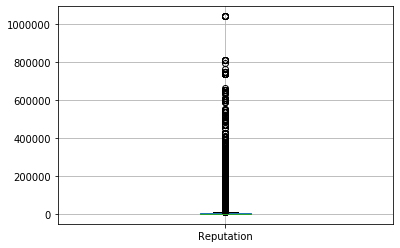

In [11]:
df.boxplot(column='Reputation')

In [12]:
df=pd.DataFrame(df)

In [13]:
X=df.values[:,:-1]
Y=df.values[:,-1]

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)

X= scaler.transform(X)

print(X)

[[-1.34582287 -1.42067741 -0.14157253 -0.53573597  1.5072655  -0.26915833]
 [ 0.67563841 -1.42067741  0.67523751  2.25794312 -1.21226978  0.32308687]
 [ 1.71056795 -1.0197016  -0.23705919  0.02299985 -0.51337753 -0.26653963]
 ...
 [-0.18371676 -1.0197016  -0.05894553 -0.53573597  0.20843454 -0.33588566]
 [-1.3206463   0.18322582 -0.2839526  -0.53573597 -0.0243399  -0.34015957]
 [ 0.47636498  0.18322582 -0.21329838  0.02299985  1.48834852 -0.33463807]]


In [15]:
Y=Y.astype(int)

In [16]:
from sklearn.model_selection import train_test_split

# split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [17]:
from sklearn.linear_model import LinearRegression
#create a model
lm = LinearRegression()

#train a model
lm.fit(X_train, Y_train)

#print intercepts and coefficients
print(lm.intercept_)
print(lm.coef_)

339.70180360161766
[ -14.81101244   18.11407945  939.12360357 -123.67769729  -14.12414309
 1577.0283859 ]


In [18]:
#predict using the model
Y_pred = lm.predict(X_test)

In [19]:
from sklearn.metrics import r2_score,mean_squared_error

import numpy as np

r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.24968273582703837
3216.168920022244
0.2496690952656938


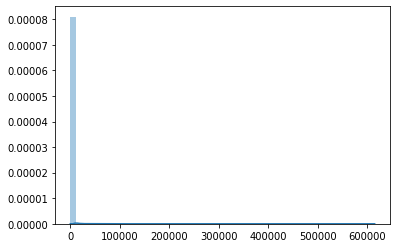

In [20]:
sns.distplot(Y, hist=True)

In [21]:
df.describe()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
count,330045.000000,330045.00000,3.300450e+05,330045.000000,330045.000000,3.300450e+05,330045.000000
mean,235748.682789,3.54305,7.773147e+03,3.917672,81442.888803,2.964507e+04,337.505358
std,136039.418471,2.49392,2.706141e+04,3.579515,49215.100730,8.095646e+04,3592.441135
min,1.000000,0.00000,0.000000e+00,0.000000,0.000000,9.000000e+00,0.000000
25%,117909.000000,1.00000,2.820000e+02,2.000000,39808.000000,2.594000e+03,8.000000
50%,235699.000000,4.00000,1.236000e+03,3.000000,79010.000000,8.954000e+03,28.000000
75%,353620.000000,6.00000,5.118000e+03,5.000000,122559.000000,2.687000e+04,107.000000
max,471493.000000,9.00000,1.042428e+06,76.000000,175738.000000,5.231058e+06,615278.000000


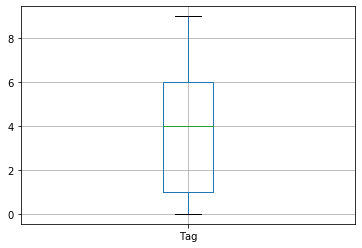

In [22]:
df.boxplot(column='Tag')

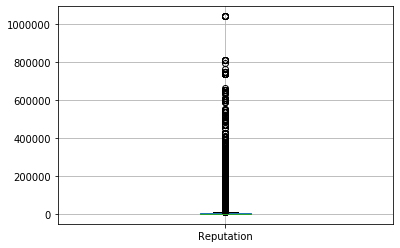

In [23]:
df.boxplot(column='Reputation')

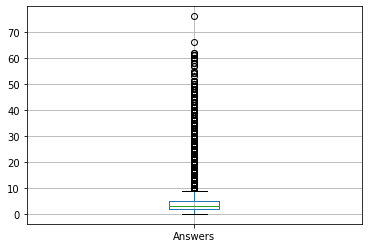

In [24]:
df.boxplot(column='Answers')

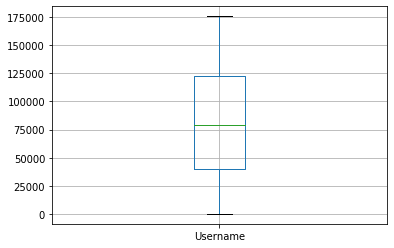

In [25]:
df.boxplot(column='Username')

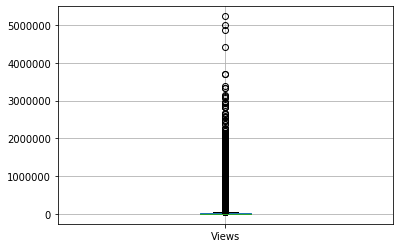

In [26]:
df.boxplot(column='Views')

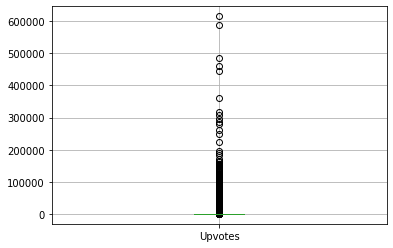

In [27]:
df.boxplot(column='Upvotes')

In [28]:
df.to_csv('dataframe.csv',index=False)

In [29]:
X=df.values[:,:-1]
Y=df.values[:,-1]

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)

X= scaler.transform(X)

print(X)

[[-1.34582287 -1.42067741 -0.14157253 -0.53573597  1.5072655  -0.26915833]
 [ 0.67563841 -1.42067741  0.67523751  2.25794312 -1.21226978  0.32308687]
 [ 1.71056795 -1.0197016  -0.23705919  0.02299985 -0.51337753 -0.26653963]
 ...
 [-0.18371676 -1.0197016  -0.05894553 -0.53573597  0.20843454 -0.33588566]
 [-1.3206463   0.18322582 -0.2839526  -0.53573597 -0.0243399  -0.34015957]
 [ 0.47636498  0.18322582 -0.21329838  0.02299985  1.48834852 -0.33463807]]


In [31]:
from sklearn.model_selection import train_test_split

# split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [32]:
df=pd.read_csv('Train_upvotes.csv',header=0)
df.head(10)


,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942,2,155623,7855,42
1,327662,a,26046,12,21781,55801,1175
2,468453,c,1358,4,56177,8067,60
3,96996,a,264,3,168793,27064,9
4,131465,c,4271,4,112223,13986,83
5,345568,r,440,1,23866,5577,4
6,376865,c,147,1,10759,17184,17
7,467378,j,2269,2,54623,312,3
8,393640,j,111,2,172926,53738,79
9,130054,c,2749,1,10189,227,0


In [33]:
 df.corr(method='pearson')

,ID,Reputation,Answers,Username,Views,Upvotes
ID,1.000000,0.008546,0.017448,0.000628,0.017400,0.006328
Reputation,0.008546,1.000000,0.066504,-0.041019,0.036455,0.266710
Answers,0.017448,0.066504,1.000000,-0.012197,0.498642,0.202033
Username,0.000628,-0.041019,-0.012197,1.000000,0.002306,-0.011970
Views,0.017400,0.036455,0.498642,0.002306,1.000000,0.437336
Upvotes,0.006328,0.266710,0.202033,-0.011970,0.437336,1.000000


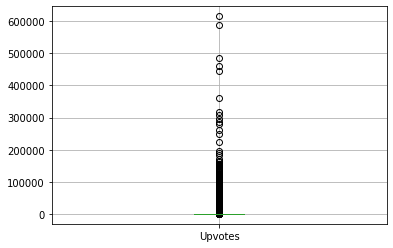

In [34]:
df.boxplot(column='Upvotes')

In [35]:
sum(df['Upvotes']>400000)

5

In [36]:
from sklearn.linear_model import Lasso
lm = Lasso()
lm.fit(X_train,Y_train)

# print intercept and coefficients
print (lm.intercept_)
print (lm.coef_)
"""
previous values:
3.353291385815151
[ 0.0437425 0.19303708 -0.04895137]
"""

339.6979057762338
[ -13.80658814   17.1904492   938.0456386  -121.69359477  -13.128287
 1575.0440198 ]


'\nprevious values:\n3.353291385815151\n[ 0.0437425 0.19303708 -0.04895137]\n'

In [37]:
Y_pred_new=lm.predict(X_test)

In [38]:

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred_new)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.24968293202915248
3216.168499520669
0.24966929147137484


In [39]:
##Model building using DT
##Accuracy here is 0.99 which is better than pruning the DT
from sklearn.tree import DecisionTreeRegressor

##Creating model object
model_DT=DecisionTreeRegressor(max_depth=20,random_state=10,max_leaf_nodes=50)
##random_state is also given here coz in DT while in different iteration it can generated 
##same values for Two iteration to prevent it 



##Train the model
model_DT.fit(X_train,Y_train)


DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
                      max_leaf_nodes=50, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=10, splitter='best')

In [40]:
##Prediction
Y_pred=model_DT.predict(X_test)
Y_pred

array([ 64.13905432, 289.03989063,  64.13905432, ...,  64.13905432,
        64.13905432,  64.13905432])

In [41]:

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.5170177247001493
2580.369961977047
0.517008944215321


In [42]:
#predicting using the Bagging_Classifier ExtraTreesClassifier
##Accuracy obtained= 98.44%
from sklearn.ensemble import ExtraTreesRegressor
 
model=ExtraTreesRegressor(100,random_state=10)
#fit the model on the data and predict the values
model=model.fit(X_train,Y_train)
 
Y_pred=model.predict(X_test)
 
 

 


In [43]:

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.8642243179796315
1368.130036175714
0.8642218496151034


In [46]:
#predicting using the Random_Forest_Classifier
##Accuracy obtained= 98.26
from sklearn.ensemble import RandomForestRegressor
 
model_RandomForest=RandomForestRegressor(n_estimators=50,random_state=10)
 
#fit the model on the data and predict the values
model_RandomForest.fit(X_train,Y_train)
 
Y_pred=model_RandomForest.predict(X_test)

In [48]:

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.7695590902013877
1782.3630557825786
0.7695549008490743
